# Household Electric Power Consumption

![](https://www.extremetech.com/wp-content/uploads/2012/12/powerlines-ac-power-transmission-640x353.jpg)

https://www.kaggle.com/uciml/electric-power-consumption-data-set/

This archive contains 2075259 measurements gathered between December 2006 and November 2010 (47 months).

Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.

## Data Description
```
1. date: Date in format dd/mm/yyyy

2. time: time in format hh:mm:ss

3. globalactivepower: household global minute-averaged active power (in kilowatt)

4. submetering1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

5. submetering2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

6. submetering3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.
```

## Load Data

In [ ]:
# get the dataset

# !wget "https://raw.githubusercontent.com/sunnypwang/mwa_workshop/master/lab2/122_260_bundle_archive.zip" 
!curl -O "https://raw.githubusercontent.com/sunnypwang/mwa_workshop/master/lab2/122_260_bundle_archive.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  9 19.4M    9 1797k    0     0  1797k      0  0:00:11 --:--:--  0:00:11 3705k
 76 19.4M   76 14.8M    0     0  14.8M      0  0:00:01  0:00:01 --:--:-- 10.0M
100 19.4M  100 19.4M    0     0  19.4M      0  0:00:01  0:00:01 --:--:-- 11.8M


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

tf.random.set_seed(100)
np.random.seed(100)

In [ ]:
df = pd.read_csv('122_260_bundle_archive.zip', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


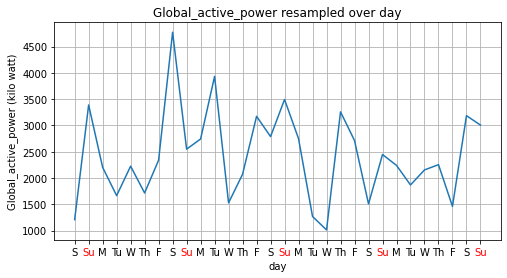

In [ ]:
dow = np.array(['S','Su','M','Tu','W','Th','F'])
plt.figure(figsize=[8, 4])
r = df.Global_active_power.resample('D').agg(['sum'])[:30]
plt.plot(r.index, r.values)
plt.grid(True)
plt.title('Global_active_power resampled over day')
plt.xticks(r.index , dow[np.arange(len(r.index)) % 7])
for i in range(1,30,7):
    plt.gca().get_xticklabels()[i].set_color('r')
plt.ylabel('Global_active_power (kilo watt)')
plt.xlabel('day')
plt.show()

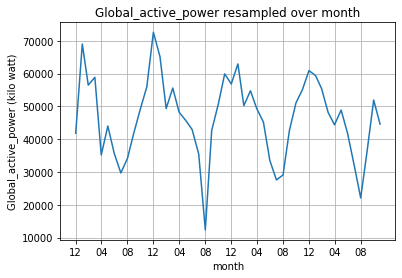

In [ ]:
r = df.Global_active_power.resample('M').agg(['sum'])[:100]
plt.plot(r.index, r.values)
plt.grid(True)
plt.title('Global_active_power resampled over month')
plt.ylabel('Global_active_power (kilo watt)')
plt.xlabel('month')
plt.xticks(r.index[::4], r.index.strftime("%m")[::4])
plt.show()
#Spring 3-5
#Summer 6-8
#Autumn 9-11
#Winter 12-2

## Feature Engineering

Fill nan

In [ ]:
# filling nan with mean in any columns
for j in range(0,7):        
    df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

Resample by day

In [ ]:
resample_by = 'day'

if(resample_by == 'day'):
    df_resample = df.resample('D').sum()
elif(resample_by == 'week'):
    df_resample = df.resample('W').sum()

df_resample.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,1571.001338,178.044092,346605.466588,6660.054895,1614.619588,1868.769244,9294.695564
std,595.405647,48.789726,7362.317888,2464.596915,1580.388756,2082.017044,3654.656623
min,250.298000,34.922000,93552.530000,1164.000000,0.000000,0.000000,1288.000000
25%,1191.182615,143.063000,345739.267500,5067.600000,705.250000,432.500000,6743.500000
50%,1559.085000,171.680000,346975.761946,6571.700000,1123.000000,714.500000,9299.582097
75%,1889.859500,202.745500,348277.315000,7953.350000,2207.750000,2714.197780,11712.750000
max,4773.386000,417.834000,356306.410000,20200.400000,11179.121923,12109.000000,23743.000000


We are going to use **current and previous days data to predict tomorrow's power consumption** (Global_active_power)

In [ ]:
def series_to_supervised(dff, n_in=1, n_out=1, dropnan=True):
	# n_vars = 1 if type(data) is list else data.shape[1]
	n_vars = dff.shape[1]
	# dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in-1, 0, -1):
		cols.append(dff.shift(i))
		names += [f'{dff.columns[j]}(t-{i})' for j in range(len(dff.columns))]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out+1):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [f'{dff.columns[j]}(t)' for j in range(len(dff.columns))]
		else:
			names += [f'{dff.columns[j]}(t+{i})' for j in range(len(dff.columns))]
	# put it all together
	
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
from datetime import timedelta
# frame as supervised learning
n_day_feat = 5
n_day_pred = 1
df_resample_add_feats = series_to_supervised(df_resample, n_day_feat, n_day_pred)

# First, we drop all today's features that we don't want to predict
today_feats_dropped = [f"{col}(t+1)" for col in df_resample.columns if col != "Global_active_power"]
df_clean = df_resample_add_feats.drop(columns=today_feats_dropped)

# Next, we drop all unncessary features of previous days
prevday_feats_dropped = []
for col in ["Global_active_power", "Global_reactive_power", "Global_intensity", "Voltage"]:
  for d in range(1,n_day_feat):
    prevday_feats_dropped.append( f"{col}(t-{d})")

for col in ["Global_active_power", "Global_reactive_power", "Global_intensity", "Voltage"]:
    prevday_feats_dropped.append( f"{col}(t)")

df_clean = df_clean.drop(columns=prevday_feats_dropped)

We will also insert additional features as one-hot vector:
- Day of Week (Sunday, Monday, ...) of **tomorrow**
- Month (January, Febuary, ..) of **tomorrow**

```
Day of Week Encoding:
1 Monday
2 Tuesday
3 Wednesday
4 Thursday
5 Friday
6 Saturday
7 Sunday
```

In [ ]:
# Then, we add categorical features such as day of week and month 
# 1 is Monday, 7 is Sunday
day_of_week = pd.get_dummies(df_clean.index.map(lambda x: (x + timedelta(days=1)).isoweekday()), prefix='day(t+1)')
day_of_week.index = df_clean.index
month = pd.get_dummies(df_clean.index.map(lambda x: (x + timedelta(days=1)).month), prefix='month(t+1)')
month.index = df_clean.index

# In total, we have
df_clean = pd.concat([df_clean, day_of_week, month], axis=1)
df_clean.head()

,Sub_metering_1(t-4),Sub_metering_2(t-4),Sub_metering_3(t-4),Sub_metering_1(t-3),Sub_metering_2(t-3),Sub_metering_3(t-3),Sub_metering_1(t-2),Sub_metering_2(t-2),Sub_metering_3(t-2),Sub_metering_1(t-1),...,month(t+1)_3,month(t+1)_4,month(t+1)_5,month(t+1)_6,month(t+1)_7,month(t+1)_8,month(t+1)_9,month(t+1)_10,month(t+1)_11,month(t+1)_12
dt,,,,,,,,,,,,,,,,,,,,,
2006-12-20,0.0,546.0,4926.0,2033.000000,4187.00000,13341.000000,1063.000000,2621.00000,14018.000000,839.000000,...,0,0,0,0,0,0,0,0,0,1
2006-12-21,2033.0,4187.0,13341.0,1063.000000,2621.00000,14018.000000,839.000000,7602.00000,6197.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
2006-12-22,1063.0,2621.0,14018.0,839.000000,7602.00000,6197.000000,0.000000,2648.00000,14063.000000,1767.243847,...,0,0,0,0,0,0,0,0,0,1
2006-12-23,839.0,7602.0,6197.0,0.000000,2648.00000,14063.000000,1767.243847,2625.59704,10433.916895,3151.000000,...,0,0,0,0,0,0,0,0,0,1
2006-12-24,0.0,2648.0,14063.0,1767.243847,2625.59704,10433.916895,3151.000000,350.00000,11131.000000,2669.000000,...,0,0,0,0,0,0,0,0,0,1


**List all features**

- `t-n` is previous day
- `t` is current day
- `t+1` is tomorrow

In [ ]:
for c in df_clean.columns:
    print(c)

Sub_metering_1(t-4)
Sub_metering_2(t-4)
Sub_metering_3(t-4)
Sub_metering_1(t-3)
Sub_metering_2(t-3)
Sub_metering_3(t-3)
Sub_metering_1(t-2)
Sub_metering_2(t-2)
Sub_metering_3(t-2)
Sub_metering_1(t-1)
Sub_metering_2(t-1)
Sub_metering_3(t-1)
Sub_metering_1(t)
Sub_metering_2(t)
Sub_metering_3(t)
Global_active_power(t+1)
day(t+1)_1
day(t+1)_2
day(t+1)_3
day(t+1)_4
day(t+1)_5
day(t+1)_6
day(t+1)_7
month(t+1)_1
month(t+1)_2
month(t+1)_3
month(t+1)_4
month(t+1)_5
month(t+1)_6
month(t+1)_7
month(t+1)_8
month(t+1)_9
month(t+1)_10
month(t+1)_11
month(t+1)_12


In [ ]:
# features - labels separation
lab_idx = list(df_clean.columns).index('Global_active_power(t+1)')

cont_features = df_clean.values[:,:lab_idx]
cat_features = df_clean.values[:, lab_idx+1:]
labels = df_clean.values[:, lab_idx:lab_idx+1]

print(cont_features.shape, cat_features.shape, labels.shape)

(1437, 15) (1437, 19) (1437, 1)


**Split the data into training and testing set**

We will use the last year as test set 

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler # for normalization

# use first three years as training
n_train_time = 365*3

# split into input and outputs
train_X_cont, train_X_cat , train_y_unscaled = cont_features[:n_train_time], cat_features[:n_train_time], labels[:n_train_time]
test_X_cont, test_X_cat, test_y_unscaled = cont_features[n_train_time:], cat_features[n_train_time:], labels[n_train_time:]

Normalize the data into a range of 0-1 using [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
# Scale continuous data
X_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler = MinMaxScaler(feature_range=(0, 1))

train_X_cont_scaled = X_scaler.fit_transform(train_X_cont)
test_X_cont_scaled = X_scaler.transform(test_X_cont)

train_y = y_scaler.fit_transform(train_y_unscaled)
test_y =  y_scaler.transform(test_y_unscaled)

# After scaling continuous features, we will combine them with categorical features
train_X = np.concatenate((train_X_cont_scaled, train_X_cat), axis=1)
test_X = np.concatenate((test_X_cont_scaled, test_X_cat), axis=1)

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1095, 34) (1095, 1) (342, 34) (342, 1)


In [ ]:
# example of training data
train_X[1]

array([0.18185686, 0.34577587, 0.66148949, 0.09508797, 0.21645057,
       0.69864442, 0.07505062, 0.62779751, 0.26941441, 0.        ,
       0.21868032, 0.7011141 , 0.15808432, 0.21683021, 0.50194374,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        ])

In [ ]:
# example of training data
train_y[1]

array([0.46230363])

## Predict power consumption of a next day

First, we will train a feed forward network model to **predict the power consumption value (`global_active_power`) of a next day**

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

def get_model(input_shape):
    inp = Input(shape=(input_shape,))
    x = Dense(50, activation='sigmoid')(inp)
    x = Dropout(0.2)(x)
    x = Dense(50, activation='sigmoid')(x)
    x = Dropout(0.2)(x)
    x = Dense(50, activation='sigmoid')(x)
    out = Dense(1, activation='sigmoid')(x)
    model = Model(inp, out)
    model.compile(optimizer='adam', loss='mae', metrics=['mae'])
    return model

tf.keras.backend.clear_session()
model = get_model(train_X.shape[1])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 34)]              0         
_________________________________________________________________
dense (Dense)                (None, 50)                1750      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51    

In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Learning Rate Scheduler
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=n_train_time*20//32,
    decay_rate=0.96,
    staircase=False)
callbacks = [tf.keras.callbacks.LearningRateScheduler(lr_schedule),tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)]

# fit network
print('Training...')
history = model.fit(train_X, train_y, epochs=100, batch_size=32, 
                    validation_data=(test_X, test_y), verbose=0, shuffle=True,
                    callbacks=callbacks)
print('Finished')

Training...
Finished


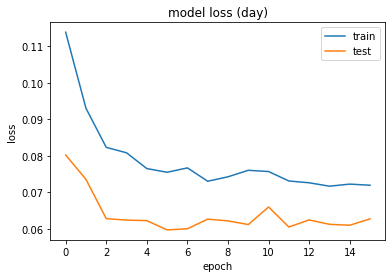

In [ ]:
# summarize history for loss
plot_step = 1
plt.plot(history.history['loss'][::plot_step])
plt.plot(history.history['val_loss'][::plot_step])
plt.title(f'model loss ({resample_by})')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**Make predictions**

Note that we have to scale the output back to original range

We can use inverse_transform to do so

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# make a prediction
pred = model.predict(test_X)

# invert scaling for forecast output
inv_scaled_pred = y_scaler.inverse_transform(pred)

### Evaluation

We use [Mean Absolute Error (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error) as a main evaluation metrics

We will compare MAE of neural network, along with several **baselines**

Baseline is a guideline that tells us how well our model perform compared to basic answers (for example, always answer with mean, always answer with previous day's value, etc)

In [ ]:
def relative_error(pred, actual):
  return np.mean(
      np.abs(pred-actual) / actual * 100
  )

In [ ]:
train_global_active_power = df_resample_add_feats['Global_active_power(t+1)'][:n_train_time].values
test_global_active_power = df_resample_add_feats['Global_active_power(t+1)'][n_train_time:].values

print('== baseline ==')
mean_baseline = np.ones(len(test_global_active_power)) * np.mean(train_global_active_power)
med_baseline = np.ones(len(test_global_active_power)) * np.median(train_global_active_power)
print("mean   MAE : {:.2f}".format(mean_absolute_error(test_global_active_power, mean_baseline)))
print("median MAE : {:.2f}".format(mean_absolute_error(test_global_active_power, med_baseline)))
test_global_active_power_prev = df_resample_add_feats['Global_active_power(t)'][n_train_time:].values
print("Use today to predict tomorrow MAE : {:.2f}".format(mean_absolute_error(test_global_active_power_prev, test_global_active_power)))
print("Use today to predict tomorrow relative error: {:.2f}%".format(relative_error(test_global_active_power_prev,test_global_active_power)))
print('')

print('== NN ==')
mae = mean_absolute_error(test_global_active_power, inv_scaled_pred.flatten())
print('Test MAE: %.3f' % (mae))
print('Test relative error: %.2f%%' % relative_error(test_global_active_power, inv_scaled_pred.flatten()))
print('')

== baseline ==
mean   MAE : 376.15
median MAE : 375.68
Use today to predict tomorrow MAE : 306.18
Use today to predict tomorrow relative error: 20.13%

== NN ==
Test MAE: 270.201
Test relative error: 17.87%



**Plot actual VS prediction**

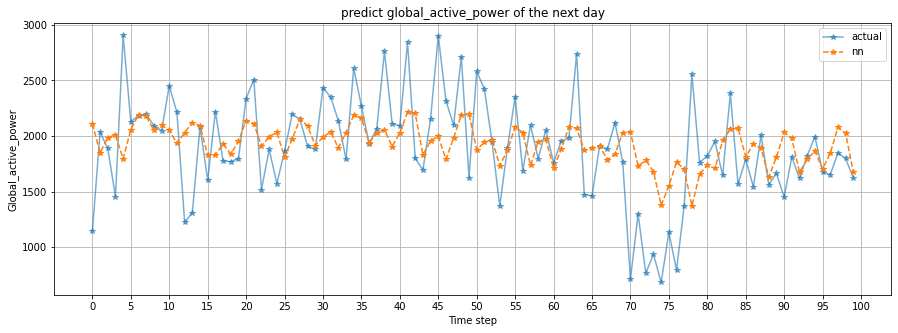

In [ ]:
plt.figure(figsize=[15, 5])
plt.grid(True)
time = 100

plt.plot(np.arange(time), test_global_active_power[:time], '-*', label="actual", alpha=0.6)
plt.plot(np.arange(time), inv_scaled_pred[:time], '--*', label="nn", alpha=1)

plt.xticks(np.arange(0,time+1,5))
plt.ylabel('Global_active_power')
plt.xlabel('Time step')
plt.legend()
plt.title(f'predict global_active_power of the next {resample_by}')
plt.show()

## Predict a change of power consumption

In this section, instead of predicting a direct value, we will **predict a change of power consumption in a next day** (how much does it increase/decrease from today)

In [ ]:
# Change the labels
global_active_power_change = (df_resample_add_feats['Global_active_power(t+1)'] - df_resample_add_feats['Global_active_power(t)']).values
global_active_power_change = global_active_power_change.reshape(-1,1)

# scale the new label
y_change_scaler = MinMaxScaler(feature_range=(0, 1))
global_active_power_change_train = y_change_scaler.fit_transform(global_active_power_change[:n_train_time])
global_active_power_change_test = y_change_scaler.transform(global_active_power_change[n_train_time:])

In [ ]:
# Create another model 
model_2 = get_model(train_X.shape[1])

In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Learning Rate Scheduler
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=n_train_time*20//32,
    decay_rate=0.96,
    staircase=False)
callbacks = [tf.keras.callbacks.LearningRateScheduler(lr_schedule),tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)]

# fit network
print('Training...')
history_2 = model_2.fit(train_X, global_active_power_change_train, epochs=100, batch_size=32, 
                    validation_data=(test_X, global_active_power_change_test), 
                    verbose=0, shuffle=True,callbacks=callbacks)
print('Finished')

Training...
Finished


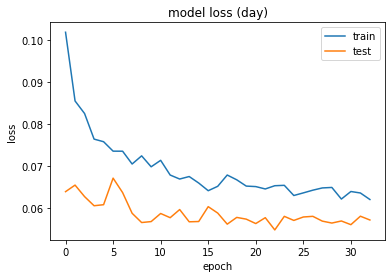

In [ ]:
# summarize history for loss
plot_step = 1
plt.plot(history_2.history['loss'][::plot_step])
plt.plot(history_2.history['val_loss'][::plot_step])
plt.title(f'model loss ({resample_by})')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**Make predictions**

Note that we have to scale the output back to original range

We can use inverse_transform to do so

In [ ]:
# make a prediction
pred_change = model_2.predict(test_X)

# invert scaling for forecast output
inv_scaled_pred_change = y_change_scaler.inverse_transform(pred_change)

### Evaluation

We use [Mean Absolute Error (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error) as a main evaluation metrics

We will compare MAE of neural network, along with several **baselines**

Baseline is a guideline that tells us how well our model perform compared to basic answers (for example, always answer with mean, always answer with previous day's value, etc)

In [ ]:
train_global_active_power = df_resample_add_feats['Global_active_power(t+1)'][:n_train_time].values
test_global_active_power = df_resample_add_feats['Global_active_power(t+1)'][n_train_time:].values

print('== baseline ==')
mean_baseline = np.ones(len(test_global_active_power)) * np.mean(train_global_active_power)
med_baseline = np.ones(len(test_global_active_power)) * np.median(train_global_active_power)
print("mean   MAE : {:.2f}".format(mean_absolute_error(test_global_active_power, mean_baseline)))
print("median MAE : {:.2f}".format(mean_absolute_error(test_global_active_power, med_baseline)))

test_global_active_power_prev = df_resample_add_feats['Global_active_power(t)'][n_train_time:].values
print("Use today to predict tomorrow MAE : {:.2f}".format(mean_absolute_error(test_global_active_power_prev, test_global_active_power)))
print("Use today to predict tomorrow relative error: {:.2f}%".format(relative_error(test_global_active_power_prev,test_global_active_power)))
print('')

print('== NN 1 (Predict Value) ==')
global_active_power_nn1_pred = inv_scaled_pred.flatten()
mae = mean_absolute_error(test_global_active_power, global_active_power_nn1_pred)
print('Test MAE: %.2f' % (mae))
print('Test relative error: %.2f%%' % relative_error(test_global_active_power, global_active_power_nn1_pred))
print('')


print('== NN 2 (Predict Change) ==')
# reconstruct global_active_power(t+1)
global_active_power_nn2_pred = inv_scaled_pred_change.flatten() + test_global_active_power_prev
mae = mean_absolute_error(test_global_active_power, global_active_power_nn2_pred)
print('Test MAE: %.2f' % (mae))
print('Test relative error: %.2f%%' % relative_error(test_global_active_power, global_active_power_nn2_pred))
print('')

== baseline ==
mean   MAE : 376.15
median MAE : 375.68
Use today to predict tomorrow MAE : 306.18
Use today to predict tomorrow relative error: 20.13%

== NN 1 (Predict Value) ==
Test MAE: 270.20
Test relative error: 17.87%

== NN 2 (Predict Change) ==
Test MAE: 265.28
Test relative error: 17.42%



**Plot actual VS prediction**

In [ ]:
import matplotlib as mpl

def plot_actual_vs_pred(actual=True, pred1=True, pred2=True):
    mpl.style.use('seaborn')
    plt.figure(figsize=[15, 5])
    plt.grid(True)
    time = 100
    if actual:
        plt.plot(np.arange(time), test_global_active_power[:time], '-*', label="actual", alpha=0.6, c='C0')
    if pred1:
        plt.plot(np.arange(time), global_active_power_nn1_pred[:time], '--*', label="pred_val", alpha=1, c='C1')
    if pred2:
        plt.plot(np.arange(time), global_active_power_nn2_pred[:time], '--*', label="pred_change", alpha=1, c='C2')
    plt.xticks(np.arange(0,time+1,5))
    plt.ylabel('Global_active_power')
    plt.xlabel('Time step')
    plt.ylim([0,3000])
    plt.legend()
    plt.title(f'predict global_active_power of the next {resample_by}')
    plt.show()

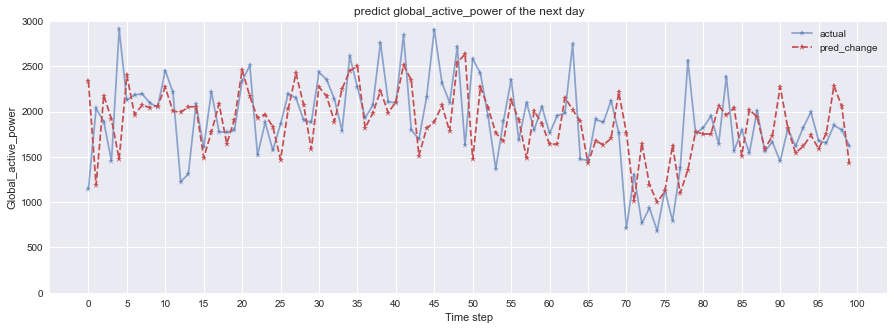

In [ ]:
plot_actual_vs_pred(True, False, True)

## Explanability

![](https://raw.githubusercontent.com/slundberg/shap/master/docs/artwork/shap_diagram.png)

### SHAP

[SHAP](https://github.com/slundberg/shap) (SHapley Additive exPlanations) is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations, uniting several previous methods [1-7] and representing the only possible consistent and locally accurate additive feature attribution method based on expectations (see the SHAP NIPS paper for details).

In [ ]:
!pip install shap

### Feature Importance of Neural Network

In [ ]:
import shap
nn_explainer = shap.DeepExplainer(model_2, train_X)
shap_values_nn = nn_explainer.shap_values(test_X)[0]
shap_values_nn.shape


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



(342, 34)

**Reading SHAP plot**

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output.

The color represents the feature value (red high, blue low). 

For example, this reveals that a high sub meter 3 today lowers the power usage tomorrow.

If tomorrow is Saturday (6), this impacts the model into predicting a higher power consumption compared to current day (Friday).

On the other hand, if tomorrow is Monday (1),  this impacts the model into predicting a lower power consumption compared to current day (Sunday).

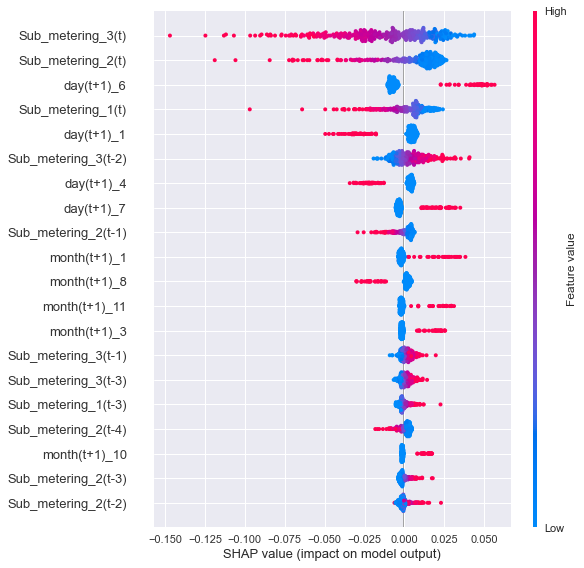

In [ ]:
feats_name = list(df_clean.columns)
feats_name.remove('Global_active_power(t+1)')

shap.summary_plot(shap_values_nn, test_X, feature_names=feats_name, plot_type='dot')

In [ ]:
shap.initjs()
shap.force_plot(nn_explainer.expected_value.numpy()[0], shap_values_nn[0,:], test_X[0,:], feature_names=feats_name)

The plot below summarizes the average impact of each feature to the output (feature importance)

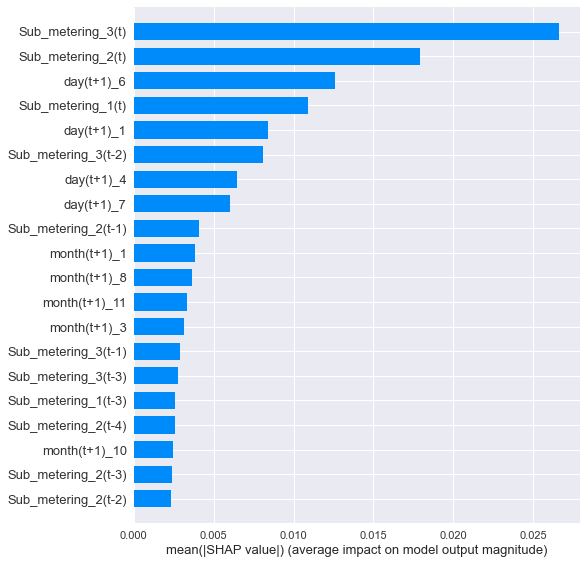

In [ ]:
shap.summary_plot(shap_values_nn, test_X, feature_names=feats_name, plot_type='bar')

In [ ]:
# for i in range(len(feats_name)):
#     shap.dependence_plot(i, shap_values_nn, test_X, feature_names=feats_name)

## TODO

Improve the model performance using the result of feature importance.

## Optional: Decision Tree using XGBoost Random Forest

In this section you will play with XGBoost Regressor Decision Tree and try to tune the hyperparameter by yourself

An example set of hyperparameters below is provided as a starting point.

You can look into a list of hyperparameters here

https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [ ]:
import xgboost
best_xgb_model = xgboost.XGBRegressor(
                 learning_rate=0.07,
                 max_depth=5,
                 min_child_weight=1.5,
                 n_estimators=40,                                                                    
                 reg_lambda=0.01,
                 verbosity=1,
                 )
best_xgb_model.fit(train_X, global_active_power_change_train)
pred_xgboost = best_xgb_model.predict(test_X).reshape(-1,1)
inv_pred_xgboost = y_change_scaler.inverse_transform(pred_xgboost)

In [ ]:
print('== XGBoost ==')
global_active_power_xgboost_pred = inv_pred_xgboost.flatten() + test_global_active_power_prev
xgboost_mae = mean_absolute_error(test_global_active_power, global_active_power_xgboost_pred)
print('Test MAE: %.2f' % (xgboost_mae))
print('Test relative error: %.2f%%' % relative_error(test_global_active_power, global_active_power_xgboost_pred))

== XGBoost ==
Test MAE: 279.83
Test relative error: 18.93%


SHAP Explainer for XGBoost

In [ ]:
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(test_X)

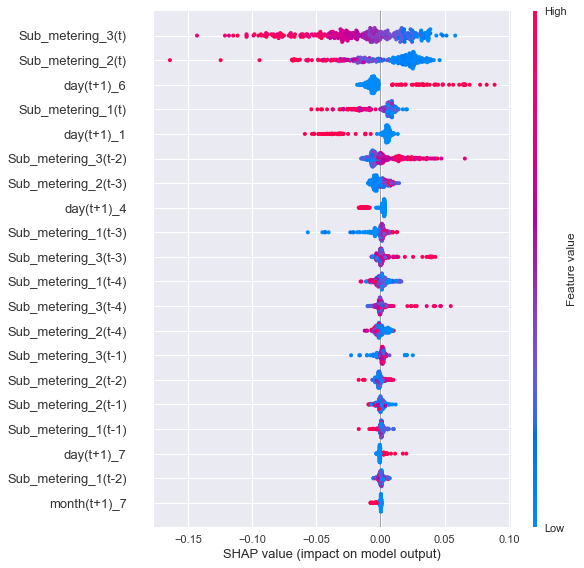

In [ ]:
shap.summary_plot(shap_values, test_X, feature_names=feats_name)